[*********************100%%**********************]  1 of 1 completed


Start Cash: 10000.00
End Cash: 10145.60


<IPython.core.display.Javascript object>


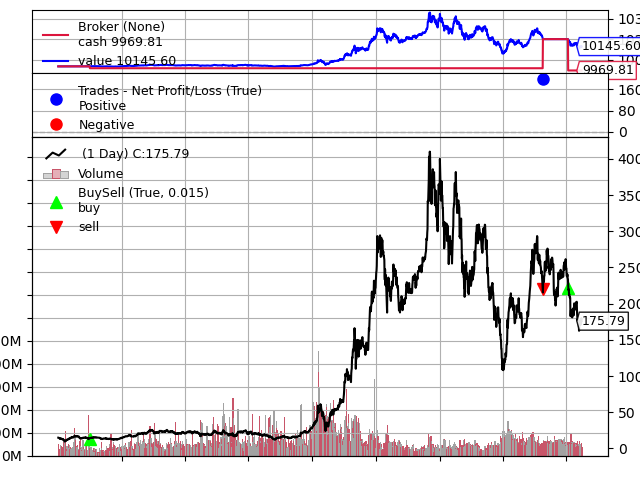

[[<Figure size 640x480 with 4 Axes>]]

In [1]:
import backtrader as bt
import pandas as pd
import datetime
import yfinance as yf

class NewsStrategy(bt.Strategy):
    params = (
        ('confidence_threshold', 40),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.news = pd.read_csv('Toutput.csv', parse_dates=True, index_col='Date')

    def next(self):
        date = bt.num2date(self.data.datetime[0]).strftime('%Y-%m-%d')
        if date in self.news.index:
            confidence = self.news.loc[date, 'Confidence']
            advice = self.news.loc[date, 'Advice']
            if confidence >= self.params.confidence_threshold:
                if advice == 'Buy':
                    self.buy()
                elif advice == 'Sell':
                    self.sell()

    def stop(self):
        print('Start Cash: %.2f' % self.broker.startingcash)
        print('End Cash: %.2f' % self.broker.getvalue())

cerebro = bt.Cerebro()

data = bt.feeds.PandasData(dataname=yf.download('TSLA', start="2016-01-01", end="2024-04-01"))
cerebro.adddata(data)
cerebro.addstrategy(NewsStrategy)

cerebro.run()


cerebro.plot()